In [149]:
# K-means聚类试写

# 给定初始类别中心


In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import math

In [151]:
# 加载下要聚类的数据
columns = ['START_TIME','END_TIME','START_LAT','START_LNG','END_LAT','END_LNG']
points = pd.read_csv(r"E:\Data\深圳共享单车\bike0-1000.csv",usecols=['START_LAT','START_LNG'],nrows=1600)
points

,START_LAT,START_LNG
0,22.636409,114.013309
1,22.585426,113.858985
2,22.647903,114.027888
3,22.518310,114.056118
4,22.544336,114.112874
...,...,...
1595,22.616258,114.060519
1596,22.521919,113.992490
1597,22.630436,113.856133
1598,22.555128,114.236700


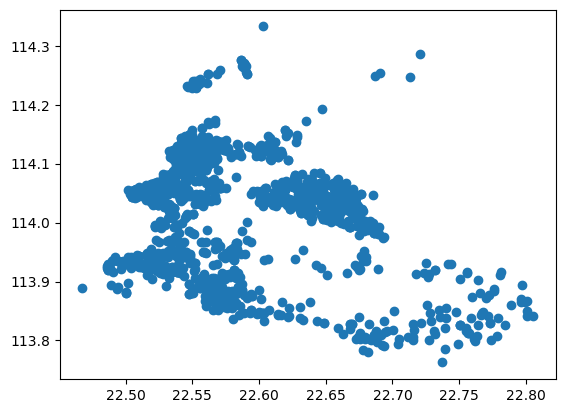

In [152]:
plt.scatter(points.START_LAT,points.START_LNG)

In [153]:
# 将数据转化为列表
points_ = [[points['START_LNG'].iloc[i],points['START_LAT'].iloc[i]] for i in range(len(points))]
points_

[[114.01330888, 22.63640929],
 [113.8589846, 22.5854262],
 [114.02788793, 22.64790277],
 [114.05611789, 22.51830989],
 [114.11287387, 22.54433607],
 [113.92407992, 22.51162231],
 [113.8296818, 22.7730887],
 [114.04723063, 22.52495154],
 [113.91148003, 22.57507975],
 [113.8646411, 22.7990375],
 [113.779892, 22.6816599],
 [113.8483255, 22.7676912],
 [114.02894743, 22.6476288],
 [113.84321493, 22.61651922],
 [114.02956046, 22.65704387],
 [113.86074623, 22.57468883],
 [114.12103185, 22.60317348],
 [114.03298925, 22.55820332],
 [114.17438933, 22.56707247],
 [113.8378098, 22.7585376],
 [114.03101016, 22.62470824],
 [113.91004147, 22.55828157],
 [113.8414421, 22.7714811],
 [114.09781573, 22.5374236],
 [114.04924365, 22.67646761],
 [114.04923295, 22.67645691],
 [114.03997965, 22.65903462],
 [114.06106293, 22.62628691],
 [114.06102283, 22.62624681],
 [114.11362373, 22.58631598],
 [113.801728, 22.6753364],
 [113.92624778, 22.51787511],
 [113.92630468, 22.51793201],
 [114.09216137, 22.554483],
 [

In [154]:
def initial(points,k=5):
    """
    points_: 要分类的点
    means:  聚类中心   
    """
    # 给定一个范围
    minx = min([point[0] for point in points])
    maxx = max([point[0] for point in points])
    miny = min([point[1] for point in points])
    maxy = max([point[1] for point in points])

    # random.uniform随机给出范围内的小数，作为初始类别
    means = [ [random.uniform(minx,maxx),random.uniform(miny,maxy)] for i in range(k)]
    return means

In [155]:
# 计算各点到初始类别中心之间的距离
def point_distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

In [156]:

def cluster_distance(points_,means):
    """
    points_: 要分类的点
    means:  聚类中心   
    """
    nearests=[[] for i in range(len(means))]  # 聚类结果，每个聚类中心代表的类有多少样本
    distance_sum = 0  # 样本和所属的中心之间的距离总和，初始化设为0
    for i in range(len(points_)):
            point = points_[i]
            # 设置一个最小距离变量
            dmin = float('inf') # 初始设置为无穷大
            jmin = None # 距离点最近的初始类别中心，将点划分到初始类别中心
            for j in range(len(means)):
                d = point_distance(point,means[j])  # 计算距离
                # 找出距离最近的中心
                if d<dmin:
                    dmin = d
                    jmin = j
            nearests[jmin].append(point) # 把样本划分到距离最近的那类中去
            distance_sum += dmin # 计算各点最小距离之和
    return distance_sum,nearests


In [177]:
# 计算各类别的质心,也就是每个类别中的x和y的均值
def k_means(points_,k,threshold=1e-5):
    '''
    points_: 要分类的点
    k: 类别数量 
    '''
    # 进行初始化
    means = initial(points_,k)
    distance_sum,nearests = cluster_distance(points_,means)

    # 迭代聚类
    not_stop = True
    while not_stop:
        means2=[]  # 新的聚类中心
        if len(nearests)!=k:
            print(1)
            means = initial(points_,k)
            distance_sum,nearests = cluster_distance(points_,means)
            continue
        for i in range(k):
            mean_class = nearests[i]
            x_sum = sum(j[0] for j in mean_class)/len(mean_class)
            y_sum = sum(j[1] for j in mean_class)/len(mean_class)
            means2.append([x_sum,y_sum])

        new_distance_sum,nearests2 = cluster_distance(points_,means2)
        diff = abs(distance_sum - new_distance_sum) # 计算两次聚类的相似程度

        # 判断是否实现了收敛
        if diff > threshold:
            # 没有完成收敛
            distance_sum = new_distance_sum
            nearests = nearests2
        else:
            means = means2
            not_stop = False
    return  nearests,means      


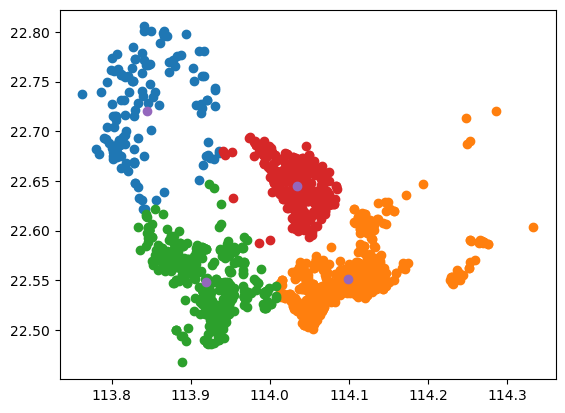

In [232]:
nearests,means = k_means(points_,4,threshold=1e-5)
pointclass_lon = []
pointclass_lat = []
for i in range(len(nearests)):
    points = nearests[i]
    pointclass_lon.append([point[0] for point in points])
    pointclass_lat.append([point[1] for point in points])
    plt.scatter(pointclass_lon[i],pointclass_lat[i])
means_lon = [point[0] for point in means]
means_lat = [point[1] for point in means]
plt.scatter(means_lon,means_lat)